In [4]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 16.9 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
import contractions

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

from nltk.corpus import stopwords
import matplotlib.pyplot as plt



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.scaler = StandardScaler()  # StandardScaler for feature scaling

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Scale the features
        X = self.scaler.fit_transform(X)

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Scale the features
        X = self.scaler.transform(X)
        
        # Predict the probability of the positive class
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        
        # Convert probability to class labels
        y_pred_class = np.where(y_pred > 0.5, 1, 0)
        return y_pred_class

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy


In [8]:
data = pd.read_csv('tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [9]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
def tweet_cleaner_without_stopwords(text):

    new_text = re.sub(r"'s\b"," is ", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split(): 
      
        ##if token not in stop_words:
          lemmatizer = WordNetLemmatizer()
          cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [13]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))


In [14]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

In [15]:
data['cleaned_tweets'] = cleaned_tweets

In [16]:
data.head()

,id,label,tweet,cleaned_tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,i m wired i know i m george i wa made that way...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple won t even talk to ...


In [17]:
data.shape

(7920, 4)

In [18]:
tweets_list = list(data['cleaned_tweets'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [19]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 100, window = 5, min_count=5, sg=0)

In [46]:
cbow_model.save("cbow_model.model")

In [21]:
len(cbow_model.wv.index_to_key)

2451

In [22]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

In [23]:
tweets_temp = data['cleaned_tweets'].apply(document_vector)

In [24]:
tweets_temp.shape

(7920,)

In [25]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 100
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(7920, 100)

In [26]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [27]:
X_word_emb = df.drop('y',axis=1)
y = df['y']
X_word_emb.shape

(7920, 100)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_word_emb, y,test_size=0.25, random_state=0)

len(X_train)

5940

In [47]:
lr = LogisticRegression(learning_rate=0.01, num_iterations=1000)
lr.fit(X_train, y_train)

In [30]:
y_pred=lr.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1478
           1       0.70      0.80      0.75       502

    accuracy                           0.86      1980
   macro avg       0.81      0.84      0.83      1980
weighted avg       0.87      0.86      0.87      1980



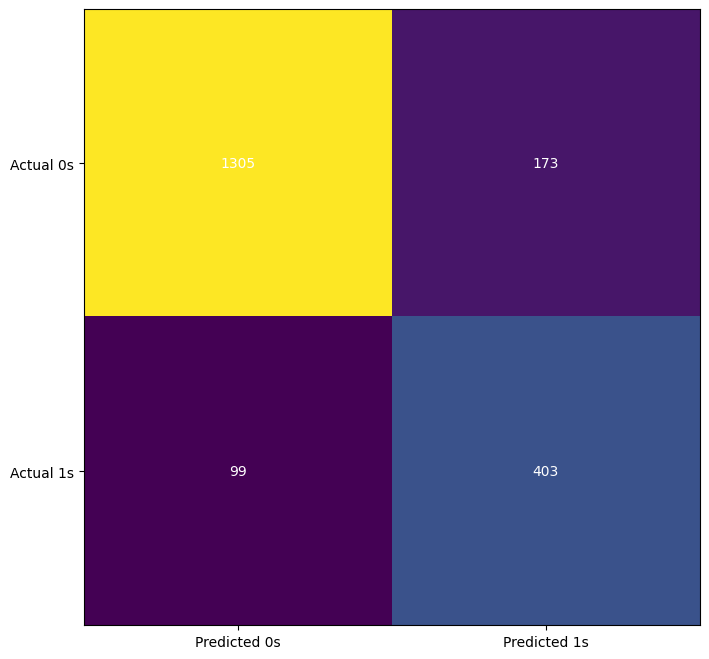

In [32]:
cm = confusion_matrix(y_test, lr.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [54]:
print(lr.score(X_train, y_train))  # train score)
print(lr.score(X_test, y_test))   # test score)  

0.8515151515151516
0.8626262626262626


In [57]:
def preprocess_text(text):
    cleaned_text = tweet_cleaner_without_stopwords(text)  # Apply the same preprocessing steps as during training
    doc_vector = document_vector(cleaned_text)  # Convert the preprocessed text to a document vector
    return doc_vector

# Example usage
new_text = "I am so disappointed with the service I received at your restaurant. The food was cold, the waiter was rude, and the atmosphere was depressing. I will never be coming back here again."

# Preprocess the new text
cleaned_text = preprocess_text(new_text)
preprocessed_text = cleaned_text.reshape(1, -1)

# Make predictions using the logistic regression model
prediction = lr.predict(preprocessed_text)

# Print the predicted sentiment
if prediction == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")



Positive sentiment


In [42]:
!pip install sklearn joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Save The LR Model

In [44]:
import joblib

joblib_file = "joblib_RL_Model.pkl"  
joblib.dump(lr, joblib_file)

['joblib_RL_Model.pkl']